In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)

import seaborn as sns
import numpy as np

from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv

from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib


%matplotlib inline

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
filename = 'facie classification.csv'
training_data = pd.read_csv(filename)
training_data

,Well_Name,Depth,SP,GR,AC,RILD,CAL,Facie,Classification
0,W46,432.0025,78.949,65.887,242.679,11.701,22.520,medium_sandstone,2
1,W46,432.1275,78.673,62.869,240.357,11.592,22.572,medium_sandstone,2
2,W46,432.2525,78.413,69.799,237.143,11.589,22.653,medium_sandstone,2
3,W46,432.3775,78.185,78.221,235.893,11.679,22.719,medium_sandstone,2
4,W46,432.5025,77.976,86.642,233.750,11.834,22.786,fine_sandstone,2
...,...,...,...,...,...,...,...,...,...
579,3128,656.5000,51.110,63.170,238.340,20.550,21.550,fine_sandstone,1
580,3128,656.6250,53.030,61.370,239.030,20.830,21.580,fine_sandstone,1
581,3128,656.7500,55.290,60.860,240.970,21.140,21.600,fine_sandstone,1
582,3128,656.8750,57.690,61.280,242.490,21.480,21.620,fine_sandstone,1


In [3]:
type_colors = ['#FD96D4', '#DA81FC', '#1BB845', '#47C6F6', '#B9B8B8']

type_labels = ['1', '2',  '3',  '4',  '5']

training_data.describe()

,Depth,SP,GR,AC,RILD,CAL,Classification
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,523.098181,71.249962,85.675402,232.391591,17.715057,21.933219,2.705479
std,75.101833,13.771939,18.525460,8.374512,2.974929,0.336985,1.524721
min,432.002500,41.280000,50.340000,205.050000,11.303000,21.370000,1.000000
25%,469.471250,64.945500,71.392250,227.679000,15.339250,21.670000,1.000000
50%,487.690000,74.842000,81.848000,233.036000,17.334500,21.871000,2.000000
75%,604.656250,82.680500,98.304500,238.393000,20.162500,22.136000,4.000000
max,657.000000,93.420000,165.293000,252.070000,26.080000,22.948000,5.000000


1    156
2    185
3     54
4     53
5    136
Name: Classification, dtype: int64

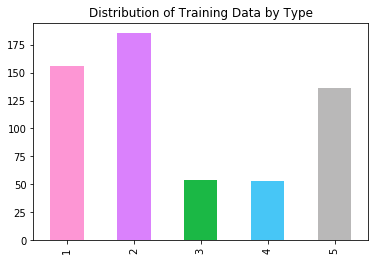

In [4]:
type_counts = training_data['Classification'].value_counts().sort_index()

type_counts.index = type_labels

type_counts.plot(kind='bar',color=type_colors, 
                   title='Distribution of Training Data by Type')
type_counts

In [5]:
data = training_data.drop(['Facie', 'Well_Name', 'Depth'], axis=1)
data

,SP,GR,AC,RILD,CAL,Classification
0,78.949,65.887,242.679,11.701,22.520,2
1,78.673,62.869,240.357,11.592,22.572,2
2,78.413,69.799,237.143,11.589,22.653,2
3,78.185,78.221,235.893,11.679,22.719,2
4,77.976,86.642,233.750,11.834,22.786,2
...,...,...,...,...,...,...
579,51.110,63.170,238.340,20.550,21.550,1
580,53.030,61.370,239.030,20.830,21.580,1
581,55.290,60.860,240.970,21.140,21.600,1
582,57.690,61.280,242.490,21.480,21.620,1


F:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


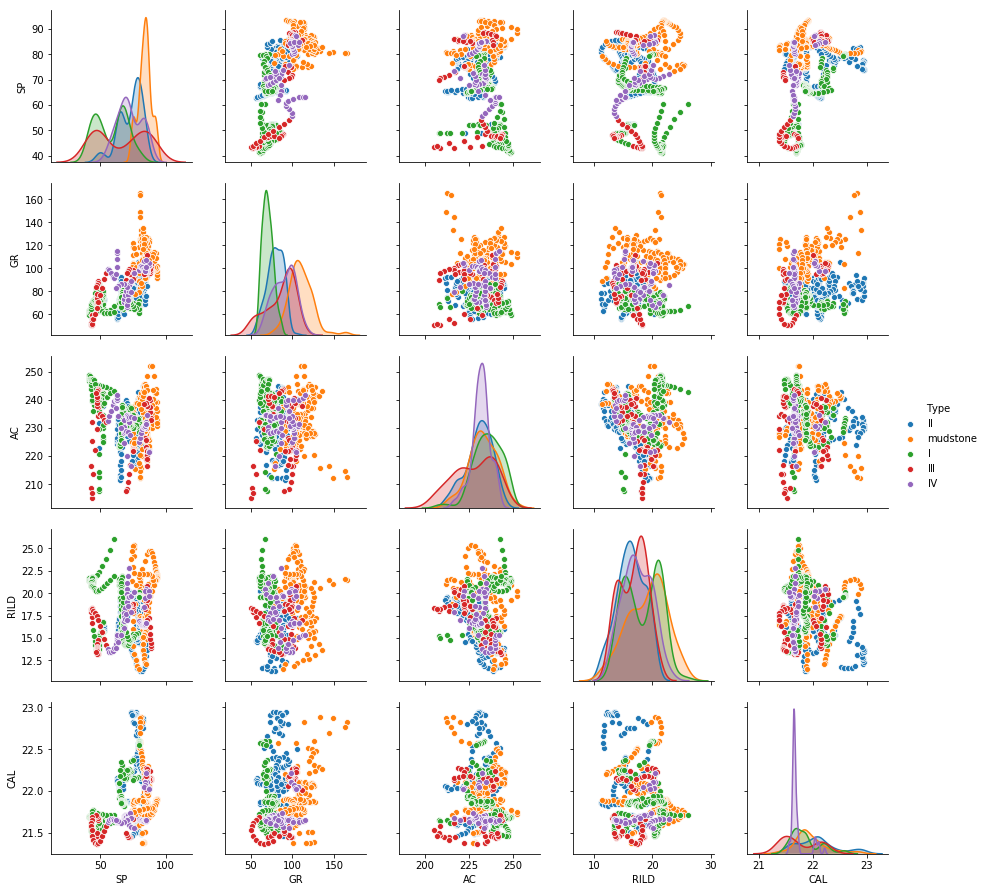

In [6]:
inline_rc = dict(mpl.rcParams)

import seaborn as sns

d= data.drop(['Classification'], axis=1)
d["Type"]= data['Classification'] 
d.loc[d["Type"]==1,"Type"]="Ⅰ" 
d.loc[d["Type"]==2,"Type"]="Ⅱ"
d.loc[d["Type"]==3,"Type"]="Ⅲ" 
d.loc[d["Type"]==4,"Type"]="Ⅳ" 
d.loc[d["Type"]==5,"Type"]="mudstone" 


sns.pairplot(d,hue="Type")

plt.savefig('pairplot.pdf', dpi=300, bbox_inches='tight')

plt.show()

mpl.rcParams.update(inline_rc)

In [7]:
training_data['Well_Name'] = training_data['Well_Name'].astype('category')
well_features = training_data.drop(['Facie', 'Well_Name', 'Depth', 'Classification'], axis=1)
well_features 

,SP,GR,AC,RILD,CAL
0,78.949,65.887,242.679,11.701,22.520
1,78.673,62.869,240.357,11.592,22.572
2,78.413,69.799,237.143,11.589,22.653
3,78.185,78.221,235.893,11.679,22.719
4,77.976,86.642,233.750,11.834,22.786
...,...,...,...,...,...
579,51.110,63.170,238.340,20.550,21.550
580,53.030,61.370,239.030,20.830,21.580
581,55.290,60.860,240.970,21.140,21.600
582,57.690,61.280,242.490,21.480,21.620


In [8]:
scaler = preprocessing.StandardScaler().fit(well_features)
x = scaler.transform(well_features)
x

array([[ 0.55951728, -1.06908905,  1.22947204, -2.02331311,  1.74275923],
       [ 0.53945934, -1.23213965,  0.95196446, -2.05998406,  1.89720102],
       [ 0.52056419, -0.85773918,  0.5678519 , -2.06099335,  2.13777381],
       ...,
       [-1.15986894, -1.34067797,  1.02522551,  1.15225606, -0.98967243],
       [-0.98545214, -1.31798703,  1.20688422,  1.2666425 , -0.93027174],
       [-0.79795409, -1.26125968,  1.28695747,  1.40121477, -0.90057139]])

In [9]:
y =training_data ['Classification'] 
y

0      2
1      2
2      2
3      2
4      2
      ..
579    1
580    1
581    1
582    1
583    1
Name: Classification, Length: 584, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [31]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_split=2, learning_rate=0.18, random_state=29)
gbr.fit(x_train, y_train.ravel())
joblib.dump(gbr, 'train_model_result3.m') 

['train_model_result3.m']

In [32]:
y_gbr = gbr.predict(x_train)
y_gbr1 = gbr.predict(x_test)
acc_train = gbr.score(x_train, y_train)
acc_test = gbr.score(x_test, y_test)
print(acc_train)
print(acc_test)

1.0
0.9246575342465754


In [36]:
gbr = joblib.load('train_model_result3.m')   
test_data = pd.read_csv("W46.csv")
test_features = test_data.drop(['Well_Name', 'Depth'], axis=1)
test_features 

,SP,GR,AC,RILD,CAL
0,83.818,82.827,232.606,11.881,22.307
1,83.465,87.896,233.293,11.670,22.355
2,83.142,93.515,233.750,11.473,22.391
3,82.818,98.994,233.829,11.306,22.415
4,82.465,104.121,234.629,11.179,22.402
...,...,...,...,...,...
941,89.521,153.860,247.024,17.866,21.485
942,89.331,153.478,248.287,18.544,21.472
943,89.026,135.897,246.992,19.327,21.462
944,88.655,114.798,242.005,20.111,21.444


In [37]:
scaler = preprocessing.StandardScaler().fit(test_features)
test_x = scaler.transform(test_features)
test_x

array([[ 0.77988687, -0.4608321 ,  0.22282976, -1.66605886,  0.62685776],
       [ 0.7301039 , -0.15995689,  0.3042261 , -1.74412095,  0.77262475],
       [ 0.68455177,  0.17356408,  0.35837184, -1.81700356,  0.88194999],
       ...,
       [ 1.51436205,  2.68918713,  1.92729507,  1.08868193, -1.93924861],
       [ 1.46204056,  1.43683635,  1.33643114,  1.37873253, -1.99391123],
       [ 1.40703954,  0.30806462,  0.50813162,  1.63215684, -1.97265354]])

In [38]:
test_y = gbr.predict(test_x)
test_y

array([2, 2, 2, 3, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 1, 5, 5, 1, 2, 2, 2, 2, 5, 5, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [39]:
test_data['Classification'] = test_y
test_data

,Well_Name,Depth,SP,GR,AC,RILD,CAL,Classification
0,W46,410.771,83.818,82.827,232.606,11.881,22.307,2
1,W46,410.896,83.465,87.896,233.293,11.670,22.355,2
2,W46,411.021,83.142,93.515,233.750,11.473,22.391,2
3,W46,411.146,82.818,98.994,233.829,11.306,22.415,3
4,W46,411.271,82.465,104.121,234.629,11.179,22.402,5
...,...,...,...,...,...,...,...,...
941,W46,528.396,89.521,153.860,247.024,17.866,21.485,5
942,W46,528.521,89.331,153.478,248.287,18.544,21.472,5
943,W46,528.646,89.026,135.897,246.992,19.327,21.462,5
944,W46,528.771,88.655,114.798,242.005,20.111,21.444,5


In [40]:
test_data.to_csv('W46_P3.csv')

In [41]:
predicted_labels = gbr.predict(test_x)

In [42]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(test_y, predicted_labels)

con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]   
con_mat_norm = np.around(con_mat_norm, decimals=2)

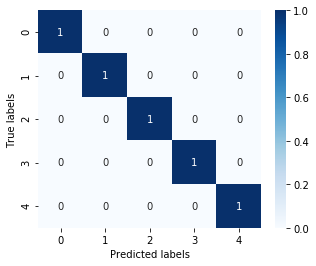

In [43]:
import seaborn as sns
figure = plt.figure(figsize=(5, 4))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig('heatmap_new1.pdf', dpi=300, bbox_inches='tight')
plt.show()